# Titanic Task
An in-depth EDA on the Titanic dataset based on the following guiding questions:
* what is the most important factor in determining whether a person was likely to survive the sinking of the Titanic?
* in the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
* "Women and children first". Was this the case?
* an observation of my own from the dataset.

## Preparations

In [1]:
# Import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('titanic.csv')

# Initial look at the data
print(f"The data has {df.shape[0]*df.shape[1]} entries in {df.shape[0]} rows and {df.shape[1]} columns.")
print("Sample rows:")
df.sample(10)

The data has 10692 entries in 891 rows and 12 columns.
Sample rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S


### Consult the metadata to understand the column entries

Survived {0 = No, 1 = Yes}\
Pclass {1 = first (upper) class passenger, 2 = second (middle) class passenger, 3 = third (lower) class passenger}\
SibSp {number of siblings or spouses onboard}\
Parch {number of parents or children onboard}\
Embarked {C = Cherbourg, Q = Queenstown, S = Southampton}

## Column observations
Looking for dependencies between column entries and redundancies. Remedying any issues found.

PassengerId = row_index + 1.

In [2]:
# Remove PassengerId as a redundant column
df.drop(['PassengerId'], inplace=True, axis=1)

Name, cabin and ticket number cannot be used for statistical analysis.

In [3]:
# Remove Name and Ticket as redundant columns
df.drop(['Name','Ticket', 'Cabin'], inplace=True, axis=1)

Fare will correlate with Pclass

In [4]:
# Remove Fare as redundant column
df.drop(['Fare'], inplace=True, axis=1)

Tidied dataset:

In [5]:
print(f"The data has {df.shape[0]*df.shape[1]} entries in {df.shape[0]} rows and {df.shape[1]} columns.")
print("Sample rows:")
df.sample(10)

The data has 6237 entries in 891 rows and 7 columns.
Sample rows:


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
821,1,3,male,27.0,0,0,S
452,0,1,male,30.0,0,0,C
557,0,1,male,NaN,0,0,C
611,0,3,male,NaN,0,0,S
227,0,3,male,20.5,0,0,S
355,0,3,male,28.0,0,0,S
857,1,1,male,51.0,0,0,S
734,0,2,male,23.0,0,0,S
702,0,3,female,18.0,0,1,C
413,0,2,male,NaN,0,0,S


## Check for missing values

In [6]:
# Get the number of missing data values per column
missing_values = df.isnull().sum()
missing_values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

All passengers embarked somewhere, so the two NaN in the Embarked column are data errors.

In [7]:
# Remove the two rows with Embarked = NaN
df.dropna(subset=['Embarked'], inplace=True)
missing_values = df.isnull().sum()
missing_values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

### Age

Investigate the NaNs in Age for potential links to other data.

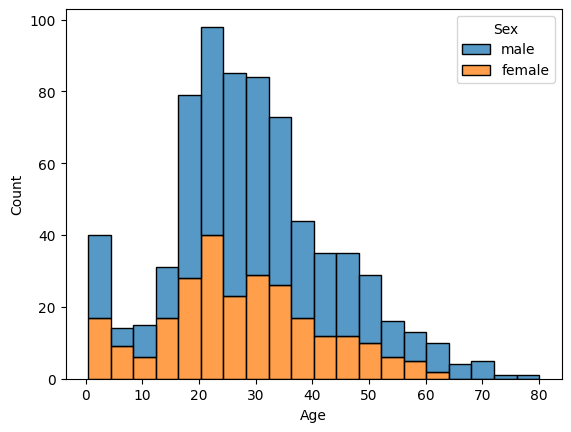

In [8]:
# Create two temporary dataframes for known age and NaN age
age_df = df.dropna(subset=['Age'])
nan_age = df[df['Age'].isnull()]

# Display known ages as a histogram
fig = plt.figure()
sns.histplot(data=age_df, x='Age', hue='Sex', multiple='stack')
plt.show()

The age distributions for males and females are similar. There are more elderly men present than women, but the modes are in a similar position.

In [9]:
# Check the male:female ratios are the same in both datasets
print('age_df')
print(age_df['Sex'].value_counts(normalize=True))
print('nan_age')
print(nan_age['Sex'].value_counts(normalize=True))

age_df
Sex
male      0.636236
female    0.363764
Name: proportion, dtype: float64
nan_age
Sex
male      0.700565
female    0.299435
Name: proportion, dtype: float64


The nan_age population is skewed slightly more towards male than the age_df population. But the discrepancy is small, so I will assume nan_age occurs in equal proportions for both sexes.

Making the same check for age vs Pclass and age vs survive.

In [10]:
print('age_df')
print(age_df['Pclass'].value_counts(normalize=True))
print(age_df['Survived'].value_counts(normalize=True))
print(f"\nnan_age")
print(nan_age['Pclass'].value_counts(normalize=True))
print(nan_age['Survived'].value_counts(normalize=True))

age_df
Pclass
3    0.498596
1    0.258427
2    0.242978
Name: proportion, dtype: float64
Survived
0    0.595506
1    0.404494
Name: proportion, dtype: float64

nan_age
Pclass
3    0.768362
1    0.169492
2    0.062147
Name: proportion, dtype: float64
Survived
0    0.706215
1    0.293785
Name: proportion, dtype: float64


It seems most of the nan_age are 3rd class passengers, and many of them died. Therefore eliminating nan_age records is likely to bias the overall analysis. To preserve as much of the nan_age data as possible, substitute a median age for NaN.

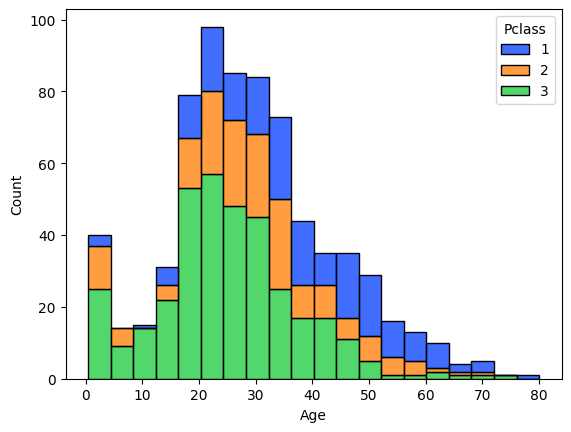

In [11]:
# Display known ages as a histogram to see if the distribution for 3rd class is any different to the overall population
fig = plt.figure()
sns.histplot(data=age_df, x='Age', hue='Pclass', multiple='stack', palette = 'bright')
plt.show()

The age distribution for Pclass = 3 is noticably lower than for other Pclasses. Therefore take the substitute age value to be the median age from Pclass.

In [12]:
# Find the substitute age from Pclass = 3
Pcl3_age_df = age_df[age_df['Pclass']==3]

sub_age = Pcl3_age_df['Age'].median()
print(sub_age)

24.0


In [13]:
# Replace NaN ages with sub_age
df['Age'] = df['Age'].fillna(sub_age)

### Replace categorical data with binary columns and remove dependencies

Research indicates most passengers are 3rd class and most embarked at Southampton. Check these assumptions before getting dummies for these columns.

In [14]:
# Check the assumption most passengers are 3rd class ie Pclass = 3
print(df['Pclass'].value_counts())

Pclass
3    491
1    214
2    184
Name: count, dtype: int64


In [15]:
# Check the assumption most passengers embark at Southampton ie Embarked = S
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Both assumptions are correct for this dataset.

In [16]:
# Get dummy columns
df_dummy = pd.get_dummies(data=df, columns=['Pclass','Embarked'])
df_dummy.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.0,1,0,False,False,True,False,False,True
1,1,female,38.0,1,0,True,False,False,True,False,False
2,1,female,26.0,0,0,False,False,True,False,False,True
3,1,female,35.0,1,0,True,False,False,False,False,True
4,0,male,35.0,0,0,False,False,True,False,False,True


Avoid the dummy variable trap by removing the dependent variables for Pclass and Embarked. Set Pclass_3 as the default (Pclass_1, Pclass_2 = 0,0 indicates Pclass_3 is true). Set Embarked_S as the default (Embarked_C, Embarked_Q = 0,0 indicates Embarked_S is true.)

In [17]:
# Avoid the dummy variable trap by removing dependent variables
col_to_drop = ['Pclass_3', 'Embarked_S']
df_dummy_drop = df_dummy.drop(columns=col_to_drop)
df_dummy_drop.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_C,Embarked_Q
0,0,male,22.0,1,0,False,False,False,False
1,1,female,38.0,1,0,True,False,True,False
2,1,female,26.0,0,0,False,False,False,False
3,1,female,35.0,1,0,True,False,False,False
4,0,male,35.0,0,0,False,False,False,False


Columns SibSp and Parch are categorical variables like Pclass and Embarked. But using get_dummies on them would result in lots of columns with potentially redundant information. The information in SibSp and Parch describes the family grouping. The size of the family group is less relevant for these questions than simply being in a family group. Therefore I will simplify the data by introducing a boolean column "Family" = True if SibSp >=1 or Parch >=1.

In [18]:
# Create Family
df_dummy_drop['Family'] = np.where(df_dummy_drop['SibSp']+df_dummy_drop['Parch'] >= 1, True, False)
df_dummy_drop.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Family
0,0,male,22.0,1,0,False,False,False,False,True
1,1,female,38.0,1,0,True,False,True,False,True
2,1,female,26.0,0,0,False,False,False,False,False
3,1,female,35.0,1,0,True,False,False,False,True
4,0,male,35.0,0,0,False,False,False,False,False


In [19]:
# Remove SibSp and Parch variables
col_to_drop = ['SibSp', 'Parch']
df_dummy_drop = df_dummy_drop.drop(columns=col_to_drop)
df_dummy_drop.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Family
0,0,male,22.0,False,False,False,False,True
1,1,female,38.0,True,False,True,False,True
2,1,female,26.0,False,False,False,False,False
3,1,female,35.0,True,False,False,False,True
4,0,male,35.0,False,False,False,False,False


## What is the most important factor in surviving the Titanic?

A Pearson correlation matrix describes the relationship between variables on a scale from +1 (strongly positively correlated) through 0 (no correlation) to -1 (strongly negatively correlated). If variables A and B are positively correlated, and A increases, B will also increase. But if they are negatively correlated B will decrease. See https://www.statology.org/how-to-read-a-correlation-matrix/ for more about correlation matrices.

In [20]:
# Use prepared data df_dummy_drop to avoid biasing the correlation
# Correlation matrix
corr = df_dummy_drop.corr(numeric_only=True)
print(corr)

            Survived       Age  Pclass_1  Pclass_2  Embarked_C  Embarked_Q  \
Survived    1.000000 -0.057833  0.282368  0.095002    0.169966    0.004536   
Age        -0.057833  1.000000  0.325686  0.039125    0.027688   -0.070967   
Pclass_1    0.282368  0.325686  1.000000 -0.287653    0.299472   -0.154680   
Pclass_2    0.095002  0.039125 -0.287653  1.000000   -0.126039   -0.127705   
Embarked_C  0.169966  0.027688  0.299472 -0.126039    1.000000   -0.148646   
Embarked_Q  0.004536 -0.070967 -0.154680 -0.127705   -0.148646    1.000000   
Family      0.206207 -0.148725  0.117091  0.038178    0.094513   -0.087099   

              Family  
Survived    0.206207  
Age        -0.148725  
Pclass_1    0.117091  
Pclass_2    0.038178  
Embarked_C  0.094513  
Embarked_Q -0.087099  
Family      1.000000  


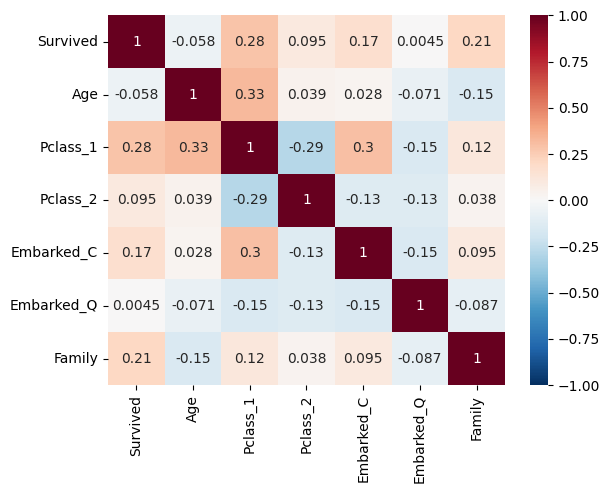

In [21]:
# Plot correlation heatmap
fig = plt.figure()
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmin=-1, vmax=1) # vmin and vmax set the scale. For easy interpretation set to +-1.
plt.show()

The most important factor for surviving the Titanic is the variable with the highest Pearson correlation factor, or the reddest in the correlation heatmap, in the Survived row. Therefore the most important factor in surviving the Titanic is Pclass_1 ie being in first class.

## Were upper class passengers prioritised?

Consider "upper class" passengers to be 1st or 2nd class. I will revert to the dataframe without the dummy variables to simplify this analysis and interpretation.

In [22]:
# Grouped bar chart showing passengers per Pclass in series 'Survived' and 'Died'
# List of x values (Pclass)
x_values = ['1', '1', '2', '2', '3', '3']
# List of y values for both series count_survived, count_died for each x_value
y_values = [
    len(df[(df['Pclass']==1) & (df['Survived']==1)]), len(df[(df['Pclass']==1) & (df['Survived']==0)]),
    len(df[(df['Pclass']==2) & (df['Survived']==1)]), len(df[(df['Pclass']==2) & (df['Survived']==0)]),
    len(df[(df['Pclass']==3) & (df['Survived']==1)]), len(df[(df['Pclass']==3) & (df['Survived']==0)])
]
# List of series labels
series = ['Survived', 'Died', 'Survived', 'Died', 'Survived', 'Died']

# Create dataframe class_df
class_df = pd.DataFrame({'Pclass': x_values,
                        'Persons': y_values,
                        'Survived': series})
# view dataframe
class_df

,Pclass,Persons,Survived
0,1,134,Survived
1,1,80,Died
2,2,87,Survived
3,2,97,Died
4,3,119,Survived
5,3,372,Died


<Axes: xlabel='Pclass', ylabel='Persons'>

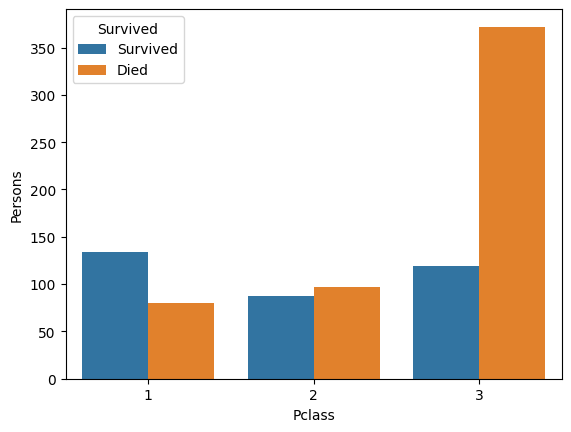

In [23]:
# Plot grouped bar chart
fig = plt.figure()
sns.barplot(x='Pclass', y='Persons', hue='Survived', data = class_df)

The grouped bar plot shows that more 1st class passengers survived the Titanic than any other class. Comparing the survived and died persons in each class shows that more than half of the 1st class passengers survived, just less than half of the second class and perhaps a quarter of the third class passengers survived.

In [24]:
# Performing the calculation to check my assertion about the proportion of survivors by class

# Size of each Pclass
pop_Pclasses = class_df.groupby('Pclass')['Persons'].sum()

# Survivors in each Pclass
survive_1 = class_df.iloc[0]['Persons']
survive_2 = class_df.iloc[2]['Persons']
survive_3 = class_df.iloc[4]['Persons']

# Find results
result_1 = 100*survive_1/pop_Pclasses.iloc[0]
result_2 = 100*survive_2/pop_Pclasses.iloc[1]
result_3 = 100*survive_3/pop_Pclasses.iloc[2]

#  Display results
print(f"{result_1:.1f}% 1st class passengers survived the Titanic.")
print(f"{result_2:.1f}% 2nd class passengers survived the Titanic.")
print(f"{result_3:.1f}% 3rd class passengers survived the Titanic.")

62.6% 1st class passengers survived the Titanic.
47.3% 2nd class passengers survived the Titanic.
24.2% 3rd class passengers survived the Titanic.


These results show higher proportions of 1st and 2nd class passengers survived the Titanic than 3rd class. This indicates upper class passengers were prioritised for places in the lifeboats.

## Is "Women and Children first" supported by the data?

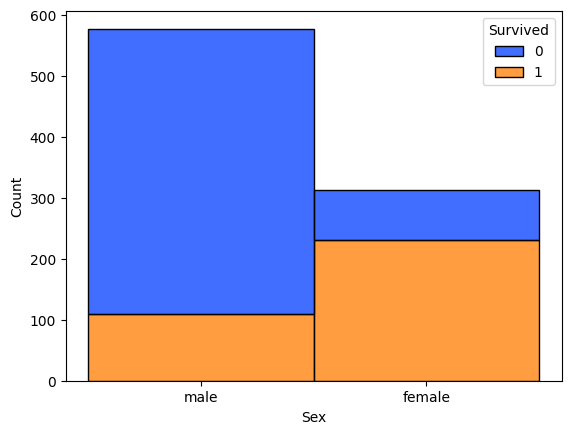

In [25]:
# Display survivor by sex as a histogram
fig = plt.figure()
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack', palette = 'bright')
plt.show()

The histplot shows that both the number of female survivors and the proportion of female survivors (orange bars) is significantly higher than for males. This supports the claim that women were prioritised over men.

For the second part of the claim, that children were prioritised, I will revert to the df_age data and remove the NaN entries. This avoids the substitute values biasing the result.

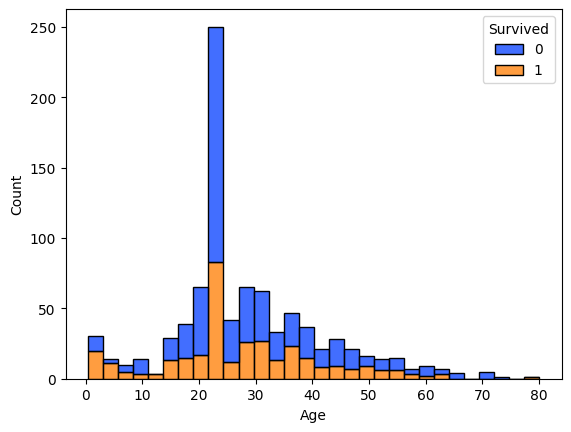

In [26]:
# Prepare the dataset
age_df = df.dropna(subset=['Age'])
# Display survivor by age as a histogram
fig = plt.figure()
sns.histplot(data=age_df, x='Age', hue='Survived', multiple='stack', palette = 'bright')
plt.show()

This is less clear than in the women first case. Reducing the bin size to 5 years (ie 16 bins).

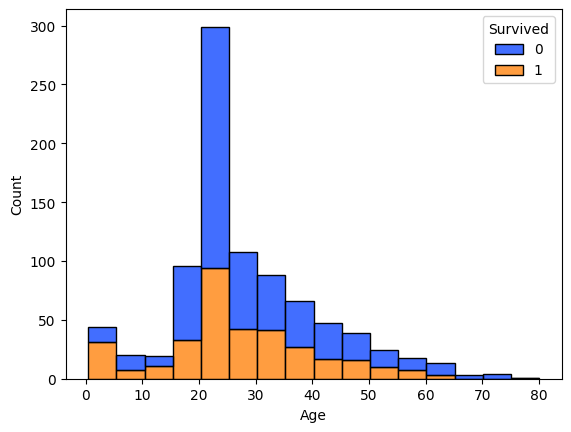

In [27]:
# Display survivor by age as a histogram
fig = plt.figure()
sns.histplot(data=age_df, x='Age', hue='Survived', multiple='stack', palette = 'bright', bins=16)
plt.show()

Looking at the proportions of survivors (in orange) against the height of each bar, which represents the number of passengers in each age group, shows the proportion of survivors is highest in the younger age groups. The Children and Young Persons Act 1908 established juvenile courts and institutions for British citizens under the age of 16 https://en.wikipedia.org/wiki/Children_Act_1908. I will consider children to be under 16 and adults 16 or over as a final check on the claim children were prioritized.  

In [28]:
# Finding the proportion of survivors for children and adults
# Creating temporary dataframes
df_child = age_df.query('Age < 16')
df_adult = age_df.query('Age >= 16')

# Use count_values to display the results
print(f"The proportion of children who survived (1) vs died (0):")
print(df_child['Survived'].value_counts(normalize=True).sort_index())
print(f"\nThe proportion of adults who survived (1) vs died (0):")
print(df_adult['Survived'].value_counts(normalize=True).sort_index())

The proportion of children who survived (1) vs died (0):
Survived
0    0.409639
1    0.590361
Name: proportion, dtype: float64

The proportion of adults who survived (1) vs died (0):
Survived
0    0.638958
1    0.361042
Name: proportion, dtype: float64


The overall proportion of children who survived is 59% compared with 36% for adults. Therefore this data supports the premise "Women and children first."

## My own observation about the data

There is a weak positive correlation (+0.17) between Embark_C and Survived, while there is a null correlation (+0.0045) between Embark_Q and Survived. I'm going to look for any connection between where a passenger embarked and their survival potential.

In [29]:
# Grouped bar chart showing passengers per Embarked in series 'Survived' and 'Died'
# List of x values (Embarked)
x_values = ['Cherbourg', 'Cherbourg', 'Queenstown', 'Queenstown', 'Southampton', 'Southampton']
# List of y values for both series count_survived, count_died for each x_value
y_values = [
    len(df[(df['Embarked']=='C') & (df['Survived']==1)]), len(df[(df['Embarked']=='C') & (df['Survived']==0)]),
    len(df[(df['Embarked']=='Q') & (df['Survived']==1)]), len(df[(df['Embarked']=='Q') & (df['Survived']==0)]),
    len(df[(df['Embarked']=='S') & (df['Survived']==1)]), len(df[(df['Embarked']=='S') & (df['Survived']==0)])
]
# List of series labels
series = ['Survived', 'Died', 'Survived', 'Died', 'Survived', 'Died']

# Create dataframe class_df
embark_df = pd.DataFrame({'Embarked': x_values,
                        'Persons': y_values,
                        'Survived': series})
# view dataframe
embark_df

,Embarked,Persons,Survived
0,Cherbourg,93,Survived
1,Cherbourg,75,Died
2,Queenstown,30,Survived
3,Queenstown,47,Died
4,Southampton,217,Survived
5,Southampton,427,Died


<Axes: xlabel='Embarked', ylabel='Persons'>

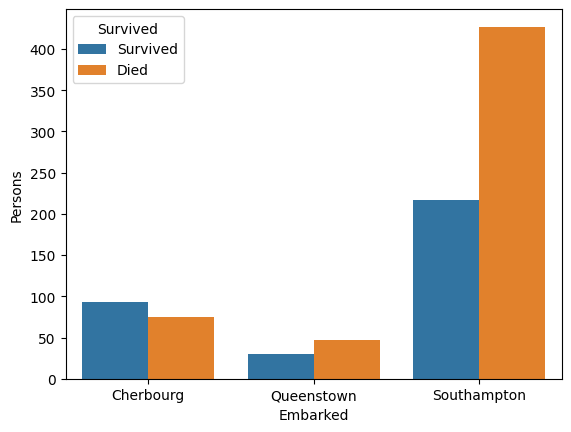

In [30]:
# Plot grouped bar chart
fig = plt.figure()
sns.barplot(x='Embarked', y='Persons', hue='Survived', data = embark_df)

This chart shows the passengers who embarked at Cherbourg had a higher proportion of survivors than people embarking at Queenstown or Southampton. Checking to see if more 1st class passengers embarked at Cherbourg or if more of them were women or children, since we have already established such passengers were more likely to survive.

In [31]:
# Pclass distribution for each embarkation point
# List of x values (Embarked)
x_values = ['Cherbourg', 'Cherbourg', 'Cherbourg', 'Queenstown', 'Queenstown', 'Queenstown', 'Southampton', 'Southampton', 'Southampton']
# List of y values for each class
y_values = [
    len(df[(df['Embarked']=='C') & (df['Pclass']==1)]), len(df[(df['Embarked']=='C') & (df['Pclass']==2)]),
    len(df[(df['Embarked']=='C') & (df['Pclass']==3)]), len(df[(df['Embarked']=='Q') & (df['Pclass']==1)]),
    len(df[(df['Embarked']=='Q') & (df['Pclass']==2)]), len(df[(df['Embarked']=='Q') & (df['Pclass']==3)]),
    len(df[(df['Embarked']=='S') & (df['Pclass']==1)]), len(df[(df['Embarked']=='S') & (df['Pclass']==2)]),
    len(df[(df['Embarked']=='S') & (df['Pclass']==3)])
]
# List of series labels
series = ['1st', '2nd', '3rd', '1st', '2nd', '3rd', '1st', '2nd', '3rd']

# Create dataframe class_df
embark_class = pd.DataFrame({'Embarked': x_values,
                        'Persons': y_values,
                        'Pclass': series})
# view dataframe
embark_class

,Embarked,Persons,Pclass
0,Cherbourg,85,1st
1,Cherbourg,17,2nd
2,Cherbourg,66,3rd
3,Queenstown,2,1st
4,Queenstown,3,2nd
5,Queenstown,72,3rd
6,Southampton,127,1st
7,Southampton,164,2nd
8,Southampton,353,3rd


<Axes: xlabel='Embarked', ylabel='Persons'>

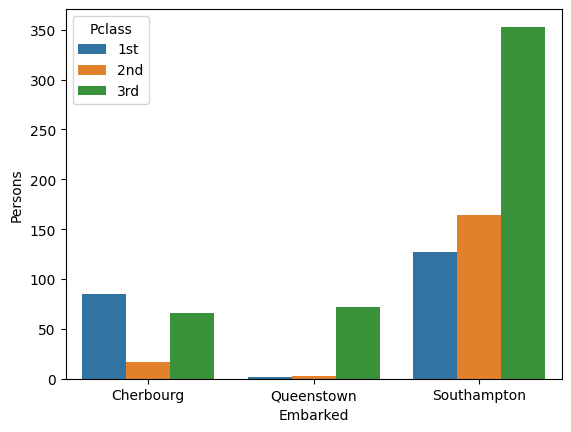

In [32]:
# Plot grouped bar chart
fig = plt.figure()
sns.barplot(x='Embarked', y='Persons', hue='Pclass', data = embark_class)

The apparent correlation between surviving and embarking in Cherbourg reflects the far higher proportion of 1st class passengers embarking from Cherbourg. Many of these were wealthy individuals traveling to New York from Paris, such as John Jacob Astor IV returning to America with his pregnant wife https://en.wikipedia.org/wiki/John_Jacob_Astor_IV#Titanic.